# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 11 </span>
## <span style="color:orange"> Keras - Neural Network regression </span>

keras
keras-applications
keras-base
keras-preprocessing 
tensorflow
tensorflow-base
tensorflow-estimator 
conda install tensorflow 
conda install keras 
(base) 
se fate conda install tensorflow dovrebbe darvi la versione 2.0 
keras dovrebbe darvi almeno la 2.3.1

### Overview 

In this notebook our task will be to perform machine learning regression on noisy data with a Neural Network (NN).

We will explore how the ability to fit depends on the structure of the NN. The goal is also to build intuition about why prediction is difficult.

### The Prediction Problem

Consider a probabilistic process that gives rise to labeled data $(x,y)$. The data is generated by drawing samples from the equation

$$
    y_i= f(x_i) + \eta_i,
$$

where $f(x_i)$ is some fixed, but (possibly unknown) function, and $\eta_i$ is a Gaussian, uncorrelate noise variable such that

$$
\langle \eta_i \rangle=0 \\
\langle \eta_i \eta_j \rangle = \delta_{ij} \sigma
$$

We will refer to the $f(x_i)$ as the **true features** used to generate the data. 

To make prediction, we will consider a NN that depend on its parameters, weights and biases. The functions that the NN can model respresent the **model class** that we are using to try to model the data and make predictions.

To learn the parameters of the NN, we will train our models on a **training data set** and then test the effectiveness of the NN on a *different* dataset, the **validation data set**. The reason we must divide our data into a training and test dataset is that the point of machine learning is to make accurate predictions about new data we have not seen.

To measure our ability to predict, we will learn our parameters by fitting our training dataset and then making predictions on our test data set. One common measure of predictive  performance of our algorithm is to compare the predictions,$\{y_j^\mathrm{pred}\}$, to the true values $\{y_j\}$. A commonly employed measure for this is the sum of the mean square-error (MSE) on the test set:
$$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$

We will try to get a qualitative picture by examining plots on validation and training data.

### Linear fit

We start by considering the very simple case:
$$
f(x)=2x+1
$$

Let's start defining the parameters of an ideal linear function which we are going to predict through a neural network regression

In [35]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

Now let's generate a set of input data which will slightly deviate from our ideal behaviour using a random noise (that actually is set to zero):

In [96]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000)
x_valid = np.random.uniform(-1, 1, 500)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.1 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

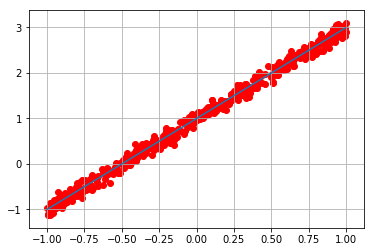

In [97]:
# plot training and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True); plt.show()

If you remember how a single node of a neural network works, you can easily spot that **just a single neuron can make the job**. So let's start using a simple Sequential model with just one layer on one neuron only!

In [98]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,))) #activation default f(x) = x

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [99]:
# get a summary of our composed model
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


We are now going to train our model, that is we feed the neuron with the set of training pair x, y_train from which the optimizer will find the best weights to minimize the Mean Square Error loss function (out linear regression function).

In [100]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/15
32/32 [==============================] - 0s 5ms/step - loss: 1.8612 - mse: 1.8612 - val_loss: 1.4605 - val_mse: 1.4605
Epoch 2/15
32/32 [==============================] - 0s 3ms/step - loss: 1.0102 - mse: 1.0102 - val_loss: 0.8436 - val_mse: 0.8436
Epoch 3/15
32/32 [==============================] - 0s 5ms/step - loss: 0.6015 - mse: 0.6015 - val_loss: 0.5229 - val_mse: 0.5229
Epoch 4/15
32/32 [==============================] - 0s 5ms/step - loss: 0.3789 - mse: 0.3789 - val_loss: 0.3361 - val_mse: 0.3361
Epoch 5/15
32/32 [==============================] - 0s 4ms/step - loss: 0.2452 - mse: 0.2452 - val_loss: 0.2187 - val_mse: 0.2187
Epoch 6/15
32/32 [==============================] - 0s 4ms/step - loss: 0.1602 - mse: 0.1602 - val_loss: 0.1459 - val_mse: 0.1459
Epoch 7/15
32/32 [==============================] - 0s 5ms/step - loss: 0.1072 - mse: 0.1072 - val_loss: 0.0989 - val_mse: 0.0989
Epoch 8/15
32/32 [==============================] - 0s 4ms/step - loss: 0.0729 - mse: 0.07

In [101]:
# return weights
model.get_weights()
for l in model.layers:
    w = l.get_weights()
    print(w[0].shape)

(1, 1)


In [102]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

16/16 [==============================] - 0s 6ms/step - loss: 0.0129 - mse: 0.0129

Test loss: 0.012875874526798725
Test accuracy: 0.012875874526798725


In [103]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

16/16 [==============================] - 0s 3ms/step - loss: 0.0034 - mse: 0.0034

Test loss: 0.0033539629075676203
Test accuracy: 0.0033539629075676203


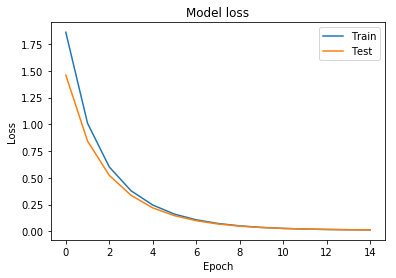

In [104]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

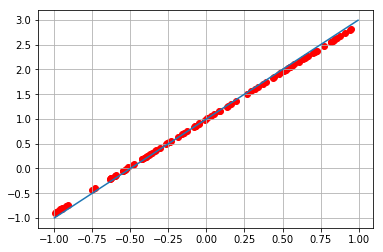

In [105]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

### Exercise 11.1

In order to make practice with NN, explore how does the previous linear regression depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$. Try to improve the previous result operating on these parameters.

I risultato ottimo lo si è stato trovato con:  
- $\texttt{epochs} = 50$ (SGD)
- $\sigma = 0.1$ 
- $N_{train} = 1000$ (validation $500$)
  
Aumentare il rumore gaussiano lasciando gli altri parametri fissi non peggiora di molto il fit. Si trova ovviamente una retta inclinata leggermente in modo diverso per mettersi in linea con tutti i dati. (sono arrivato fino a $\sigma = 1$)  
  
Lasciando fisso $\sigma$ ed $\texttt{epochs}$ si possono utilizzare anche pochi $N_{train}$ per ottenere un buon fit. Sono sceso fino a $200$ (con validatio $100$), sotto 200 inizia a peggiorare di più.  
  
Variando invece il numero $\texttt{epochs}$ si può scendere fino a $15$. Oltre il valore della loss non varia più di molto.   

### Exercise 11.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

In order to make practice with NN, explore reasonable different choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Make graphs comparing fits for different NNs.
Check your NN models by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

In [284]:
a = 4 
b = -3
c = -2
d = 3

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 5000)
x_valid = np.random.uniform(-1, 1, 500)
x_valid.sort()
y_target =  a + b*x_valid+c*x_valid**2+d*x_valid**3# ideal (target) linear function

sigma = 0.1 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(a + b*x_train+c*x_train**2+d*x_train**3, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(a + b*x_valid+c*x_valid**2+d*x_valid**3, sigma)

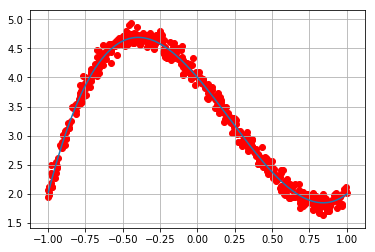

In [285]:
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True); plt.show()

In [286]:
model = tf.keras.Sequential()
model.add(Dense(2, input_shape=(1,),activation="tanh")) #2 neuroni
#model.add(Dense(2, input_shape=(1,),activation="elu"))
#model.add(Dense(2, input_shape=(1,),activation="selu"))
#model.add(Dense(2, input_shape=(1,),activation="softsign"))
#model.add(Dense(2, input_shape=(1,),activation="relu"))
#model.add(Dense(2, input_shape=(1,),activation="softmax"))
#model.add(Dense(2, input_shape=(1,),activation="sigmoid"))

model.add(Dense(1)) #ho solo un output
#metrics=['accuracy']
# compile the model choosing optimizer, loss and metrics objects
#model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
#model.compile(optimizer='Adadelta', loss='mse', metrics=['mse'])
#model.compile(optimizer='Adam', loss='mse', metrics=['mse'])
model.compile(optimizer='RMSprop', loss='mse', metrics=['mse'])
#model.compile(optimizer='Nadam', loss='mse', metrics=['mse'])

In [287]:
model.summary()

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 2)                 4         
_________________________________________________________________
dense_66 (Dense)             (None, 1)                 3         
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


In [288]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=100,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid) )

Epoch 1/100
157/157 [==============================] - 0s 2ms/step - loss: 11.1115 - mse: 11.1115 - val_loss: 10.1346 - val_mse: 10.1346
Epoch 2/100
157/157 [==============================] - 0s 2ms/step - loss: 9.2217 - mse: 9.2217 - val_loss: 8.1248 - val_mse: 8.1248
Epoch 3/100
157/157 [==============================] - 0s 2ms/step - loss: 7.1384 - mse: 7.1384 - val_loss: 6.0097 - val_mse: 6.0097
Epoch 4/100
157/157 [==============================] - 0s 2ms/step - loss: 5.0538 - mse: 5.0538 - val_loss: 4.0200 - val_mse: 4.0200
Epoch 5/100
157/157 [==============================] - 0s 2ms/step - loss: 3.2139 - mse: 3.2139 - val_loss: 2.4002 - val_mse: 2.4002
Epoch 6/100
157/157 [==============================] - 0s 2ms/step - loss: 1.8275 - mse: 1.8275 - val_loss: 1.2795 - val_mse: 1.2795
Epoch 7/100
157/157 [==============================] - 0s 2ms/step - loss: 0.9388 - mse: 0.9388 - val_loss: 0.6537 - val_mse: 0.6537
Epoch 8/100
157/157 [==============================] - 0s 2ms/ste

157/157 [==============================] - 0s 2ms/step - loss: 0.0198 - mse: 0.0198 - val_loss: 0.0210 - val_mse: 0.0210
Epoch 63/100
157/157 [==============================] - 0s 2ms/step - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0204 - val_mse: 0.0204
Epoch 64/100
157/157 [==============================] - 0s 2ms/step - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0198 - val_mse: 0.0198
Epoch 65/100
157/157 [==============================] - 0s 2ms/step - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0194 - val_mse: 0.0194
Epoch 66/100
157/157 [==============================] - 0s 2ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 67/100
157/157 [==============================] - 0s 2ms/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0187 - val_mse: 0.0187
Epoch 68/100
157/157 [==============================] - 0s 2ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 69/100
157/157 [==============================] - 0s 2ms/step - loss:

In [289]:
# return weights
model.get_weights()
for l in model.layers:
    w = l.get_weights()
    print(w[0].shape)

(1, 2)
(2, 1)


In [290]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

16/16 [==============================] - 0s 1ms/step - loss: 0.0133 - mse: 0.0133

Test loss: 0.013340642675757408
Test accuracy: 0.013340642675757408


In [291]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

16/16 [==============================] - 0s 1ms/step - loss: 0.0035 - mse: 0.0035

Test loss: 0.003492609830573201
Test accuracy: 0.003492609830573201


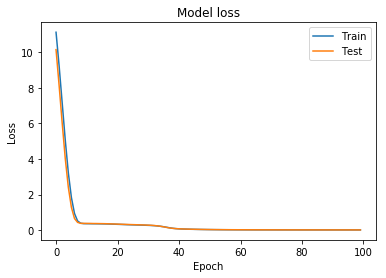

In [292]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

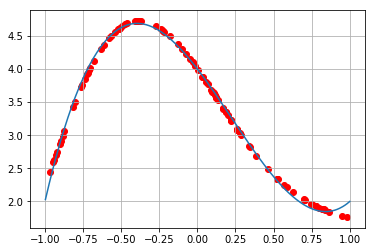

In [293]:
x_predicted = np.random.uniform(-1, 1, 100)
#print(x_predicted.size)
y_predicted = model.predict(x_predicted)
#print(y_predicted.size)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

### COMMENTO

Ho lasciato fissi:
- $\sigma = 0.1$ 
- $\texttt{epochs}=100$.
- $N_{train}=5000$ (validation $500$), voglio avere un set di dati molto grande, con meno punti fittava con una retta
- numero di layer nascosti $1$  
  
**nota** Ho anche provato a mettere più layer nascosti, ciascuno con $2$ neuroni. Il primo layer con activation $\texttt{tanh}$, e gli altri con $\texttt{elu}$,$\texttt{relu}$,$\texttt{softmax}$. Il risultato del fit non cambia. Esegue sempre un buon fit.  

Si ottiene un buon risultato con:  
- activation $\texttt{tanh}$
- neuroni layer nascosto $2$
- optimizer $\texttt{SGD}$  
  
Variando il numero di neuroni del layer nascosto sono arrivato fino a $30$, senza cambiare praticamente mai il risultato trovate. La rete ricava sempre un buon fit.  
  
Per il layer nascosto ho usato come activation:  
- $\texttt{softmax}$ (solo da 0 in poi)
- $\texttt{elu}$ (prima dello 0 molto bene, poi scende come una retta)
- $\texttt{selu}$ (come elu)
- $\texttt{relu}$ (fit squadrato potremmo dire, approssimava con un angolo retto la gobba)
- $\texttt{tanh}$ (**best**)
- $\texttt{softsign}$ (inizia a fare un buon fit della curva, leggermente traslato) 
- $\texttt{sigmoid}$ (da 0 in poi)
  
**the winner is** : l'unica funzione che mi ha permesso di fittare la curva è stata la $\texttt{tanh}$
  
Per loro ho usato sempre lo $\texttt{SGD}$, successivamente con layer nascosto come sopra e con activation $\texttt{tanh}$ ho variato l'*optimizer*:
- $\texttt{SGD}$
- $\texttt{Adadelta}$ (non trovo il minimo, non ce la fa)
- $\texttt{Nadam}$ (ottimo come $\texttt{SGD}$)
- $\texttt{Adam}$ (ottimo come $\texttt{SGD}$)
- $\texttt{RMSprop}$ (ottimo anche lui)

### Exercise 11.3
  
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

In [527]:
def z_function(x, y):
    return np.sin(x ** 2 + y ** 2)

np.random.seed(0)
X_train = np.random.uniform(-1.5, 1.5,(10000,2))
X_valid = np.random.uniform(-1.5, 1.5,(1000,2))
X_valid[:,0].sort()
X_valid[:,1].sort()
Z_target = z_function(X_valid[:,0],X_valid[:,1])

sigma = 0.1 # noise standard deviation, for the moment it is absent
Z_train = np.random.normal(z_function(X_train[:,0],X_train[:,1]),sigma) 
Z_valid = np.random.normal( z_function(X_valid[:,0],X_valid[:,1]),sigma )

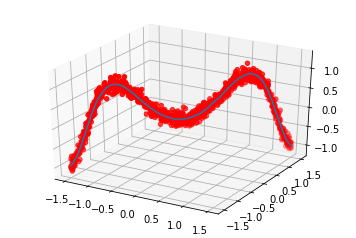

In [528]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = plt.axes(projection="3d")

X,Y = np.meshgrid(X_valid[:,0],X_valid[:,1])
Z = z_function(X, Y)

#ax.plot_wireframe(X, Y, Z, color='green')
#ax.scatter3D(X, Y, Z, 'z', color='r')

ax.plot3D(X_valid[:,0],X_valid[:,1], Z_target,zdir='z') #così non fa la superficie
ax.scatter3D(X_valid[:,0], X_valid[:,1], Z_valid, 'z', color='r')
#plt.grid(True) 
plt.show()

In [529]:
model = tf.keras.Sequential() #input (x,y)
#model.add(Dense(30, input_shape=(2,),activation="tanh")) 
model.add(Dense(30, input_shape=(2,),activation="relu")) #questa è la migliore. con meno neuroni non fa bene
#model.add(Dense(30, input_shape=(2,),activation="elu"))
#model.add(Dense(30, input_shape=(2,),activation="softsign"))
#model.add(Dense(30, input_shape=(2,),activation="sigmoid")) #dovrei provare a farlo con più rumore
#model.add(Dense(30, input_shape=(2,),activation="softmax"))
#model.add(Dense(30, input_shape=(2,),activation="selu"))
#model.add(Dense(30, input_shape=(2,),activation="softplus"))
#model.add(Dense(30, input_shape=(2,)))

model.add(Dense(1)) #output z
# compile the model choosing optimizer, loss and metrics objects
#model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.compile(optimizer='RMSprop', loss='mse', metrics=['mse'])

In [530]:
model.summary()

Model: "sequential_56"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_119 (Dense)            (None, 30)                90        
_________________________________________________________________
dense_120 (Dense)            (None, 1)                 31        
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [531]:
history = model.fit( X_train , Z_train, 
          validation_data=( X_valid, Z_valid ), shuffle=True,
          batch_size=32, epochs=50 )
                    

Epoch 1/50
313/313 [==============================] - 1s 2ms/step - loss: 0.2353 - mse: 0.2353 - val_loss: 0.3627 - val_mse: 0.3627
Epoch 2/50
313/313 [==============================] - 1s 2ms/step - loss: 0.1395 - mse: 0.1395 - val_loss: 0.3032 - val_mse: 0.3032
Epoch 3/50
313/313 [==============================] - 1s 2ms/step - loss: 0.1206 - mse: 0.1206 - val_loss: 0.2614 - val_mse: 0.2614
Epoch 4/50
313/313 [==============================] - 1s 2ms/step - loss: 0.1028 - mse: 0.1028 - val_loss: 0.2273 - val_mse: 0.2273
Epoch 5/50
313/313 [==============================] - 1s 2ms/step - loss: 0.0873 - mse: 0.0873 - val_loss: 0.1741 - val_mse: 0.1741
Epoch 6/50
313/313 [==============================] - 1s 2ms/step - loss: 0.0729 - mse: 0.0729 - val_loss: 0.1297 - val_mse: 0.1297
Epoch 7/50
313/313 [==============================] - 1s 2ms/step - loss: 0.0607 - mse: 0.0607 - val_loss: 0.1203 - val_mse: 0.1203
Epoch 8/50
313/313 [==============================] - 1s 2ms/step - loss: 0.

In [532]:
# return weights
model.get_weights()
for l in model.layers:
    w = l.get_weights()
    print(w[0].shape)

(2, 30)
(30, 1)


In [533]:
# evaluate model
score = model.evaluate(X_valid, Z_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

32/32 [==============================] - 0s 1ms/step - loss: 0.0132 - mse: 0.0132

Test loss: 0.013199949637055397
Test accuracy: 0.013199949637055397


In [534]:
# evaluate model with the exact curve
score = model.evaluate(X_valid, Z_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

32/32 [==============================] - 0s 2ms/step - loss: 0.0028 - mse: 0.0028

Test loss: 0.002837667241692543
Test accuracy: 0.002837667241692543


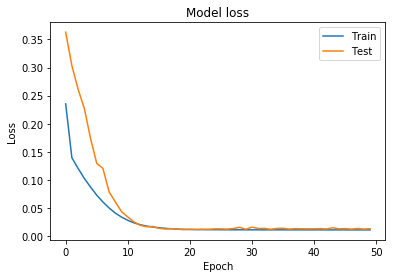

In [535]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

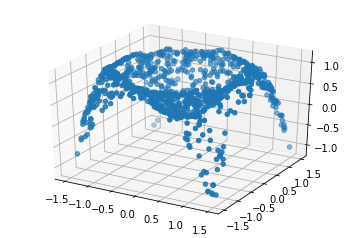

In [536]:
X_predicted = np.random.uniform(-1.5,1.5,(1000,2)) #con pochi punti si vede bene
Z_predicted = model.predict(X_predicted)

fig = plt.figure()
ax = plt.axes(projection="3d")

ax.scatter3D(X_predicted[:,0],X_predicted[:,1], Z_predicted,zdir='z') 
#ax.plot3D(X_valid[:,0], X_valid[:,1], Z_target, zdir='z', color='r')

X,Y = np.meshgrid(X_valid[:,0],X_valid[:,1])
Z = z_function(X, Y)
#ax.plot_wireframe(X, Y, Z, color='red',alpha=0.5)
#plt.grid(True) 

plt.show()

### COMMENTO

Ho eseguito le stesse prove fatte per l'esercizio 11.02, aumentando però il numero di punti generati. Ho notato che per questo fit è stato fondamentale utilizzare più neuroni per layer.  
  
Si ottiene un ottimo risultato con:  
- $\texttt{N}_{train} = 10000$ (per dimensione, validation $1000$)
- $\texttt{epochs}=50$
- $\sigma = 0.1$
- un *layer* nascosto con $30$ neuroni, activation *relu*
- Optimizer $\texttt{RMSprop}$ (ho usato anche $\texttt{SGD}$, ma per lui $150$ $\texttt{epochs}$ )
  
variando la funzione di attivazione mantenendo un singolo *layer* con $30$ neuroni:
- $\texttt{tanh}$ (non buona)
- $\texttt{elu}$ (non buona)
- $\texttt{selu}$ (buono!)
- $\texttt{relu}$ (**the winner is**)
- $\texttt{softsign}$ (la rete ricava un buon fit)
- $\texttt{sigmoid}$ (taglia il tutto con un piano)
- $\texttt{softplus}$ (simile a sigmoid.. la loss sul validation è brutta)
- $\texttt{softmax}$ (come sigmoid)
  
Prendendo 3 layer di fila composti da 30 neuroni nascosti, con activation:
- $\texttt{relu}$
- $\texttt{selu}$
- $\texttt{softsign}$
  
esegue un buon fit. Se metto sempre tre layers così ma composti da 10 neuroni il fit inizia a peggiorare
con 20 inizia ad essere sempre più buono. Con 5 neuroni ciascun layer non riesce più a fittare bene.  
Considerando un solo layer con activation $\texttt{relu}$ si può arrivare a un minimo di 20 neuroni.   

Ideas to meditate on these exercises and judge your results can be found <a href=https://xkcd.com/2048/>here</a>

### <span style="color:green">Supplementary material: Keras model.fit available callbacks</span>

The .fit method can also get <a href=https://keras.io/callbacks/>callback</a> functions which can be used to customize the fitting procedure with special actions.

Keras provides some predefined callbacks to feed in, among them for example:
- **TerminateOnNaN()**: that terminates training when a NaN loss is encountered
- **ModelCheckpoint(filepath)**: that save the model after every epoch
- **EarlyStopping()**: which stop training when a monitored quantity has stopped improving

You can select one or more callback and pass them as a list to the callback argument of the fit method.

Now we are going to construct a callback object to represent how estimated parameters are converging during the training procedure

In [33]:
from IPython.display import clear_output

class PlotCurrentEstimate(tf.keras.callbacks.Callback):
    def __init__(self, x_valid, y_valid):
        """Keras Callback which plot current model estimate against reference target"""
        
        # convert numpy arrays into lists for plotting purposes
        self.x_valid = list(x_valid[:])
        self.y_valid = list(y_valid[:])
        self.iter=0

    def on_epoch_end(self, epoch, logs={}):
        
        temp = self.model.predict(self.x_valid, batch_size=None, verbose=False, steps=None)
        self.y_curr = list(temp[:]) # convert numpy array into list
        
        self.iter+=1
        if self.iter%10 == 0:
            clear_output(wait=True)            
            self.eplot = plt.subplot(1,1,1)
            self.eplot.clear()     
            self.eplot.scatter(self.x_valid, self.y_curr, color="blue", s=4, marker="o", label="estimate")
            self.eplot.scatter(self.x_valid, self.y_valid, color="red", s=4, marker="x", label="valid")
            self.eplot.legend()

            plt.show()

We will use also an EarlyStopping callback on the val_loss quantity. This will stop the training process as soon as the val_loss quantity does not improve anymore after an amount of epochs, preventing a long time of wated computation to take over without useful results.

<code>keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)</code>

Arguments:

- <code>monitor</code>: quantity to be monitored. 
- <code>min_delta:</code> minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement. 
- <code>patience:</code> number of epochs with no improvement after which training will be stopped. 
- <code>verbose:</code> verbosity mode. 
- <code>mode:</code> one of {auto, min, max}. In min mode, training will stop when the quantity monitored has stopped decreasing; in max mode it will stop when the quantity monitored has stopped increasing; in auto mode, the direction is automatically inferred from the name of the monitored quantity. 
- <code>baseline:</code> Baseline value for the monitored quantity to reach. Training will stop if the model doesn't show improvement over the baseline. 
- <code>restore_best_weights:</code> whether to restore model weights from the epoch with the best value of the monitored quantity. If False, the model weights obtained at the last step of training are used.

In [ ]:
plot_estimate = PlotCurrentEstimate(x_valid, y_valid)

earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                  min_delta=0, patience=100, mode='auto')

model.fit(x_valid, y_valid, batch_size=32, epochs=150,
          validation_data=(x_valid, y_valid),
          callbacks=[ plot_estimate, earlystop]
          )

model.get_weights()